In [1]:
# imports
# import numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [4]:
# model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [5]:
# cross validation
from sklearn.model_selection import train_test_split


In [6]:
#data
#rawData = pd.read_csv('default_of_credit_card_clients.csv')
rawData = pd.read_csv('credit_no_id.csv')
pd.read_csv
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_BINS,AGE_BY_DECADE
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,"(20, 29]",20s
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,"(20, 29]",20s
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,"(29, 39]",30s
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,"(29, 39]",30s
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,"(49, 59]",50s


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [8]:
# convert some of the int variables to categorical variables
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['PAY_0'] = rawData['PAY_0'].astype('category')
rawData['PAY_2'] = rawData['PAY_2'].astype('category')
rawData['PAY_3'] = rawData['PAY_3'].astype('category')
rawData['PAY_4'] = rawData['PAY_4'].astype('category')
rawData['PAY_5'] = rawData['PAY_5'].astype('category')
rawData['PAY_6'] = rawData['PAY_6'].astype('category')
rawData['default payment next month'] = rawData['default payment next month'].astype('category')

In [9]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [10]:
# Create new dataframe and then drop ID column
credit_no_id = rawData
credit_no_id.info
credit_no_id.drop('AGE_BINS',axis=1,inplace=True)
credit_no_id.drop('AGE_BY_DECADE',axis=1,inplace=True)
credit_no_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [11]:
#features
features = credit_no_id.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [12]:
#dependent variable
depVar = credit_no_id['default payment next month']

In [13]:
#Training Set (Feature Space: X Training)
X = features   
y = depVar

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state = 10)

x_train_count = len(X_train.index)
print('The number of observations in the X training set are:',str(x_train_count))
X_train.head()

The number of observations in the X training set are: 21000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19147,200000,2,3,2,29,-1,-1,-1,-1,0,...,12555,882,882,0,7485,12625,882,0,0,0
5380,20000,1,2,2,23,1,2,0,0,0,...,19447,19312,17987,17822,1500,1500,1000,1000,1000,1000
15486,180000,1,2,2,43,-1,-1,-2,-2,-2,...,2378,10396,2527,2173,5739,2385,10427,2534,2179,13903
19794,180000,2,2,1,39,-1,-1,0,-1,0,...,11867,8111,6312,3739,11662,6003,8111,273,3739,6547
11102,290000,2,2,2,29,-2,-1,-1,-1,-1,...,0,302,390,1278,1591,0,302,390,1278,0


In [14]:
#Dependent Variable Training Set (y Training)
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


19147    0
5380     0
15486    0
19794    0
11102    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [15]:
#Testing Set (X Testing)
#X_test = X[-X_train:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
20412     160000   1         1        2   26    -1    -1    -1    -1    -1   
1296       50000   1         2        2   29     1     2     2     2     0   
3906      380000   2         1        1   33     0     0     0     0     0   
20454     400000   1         1        2   26     0     0     0     0     0   
5200       60000   2         1        2   34     0     0     0     0     0   

       ... BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
20412  ...     15193      10845      46397      32334     15134     15199   
1296   ...     39863      38924      39744      40533         0      4500   
3906   ...    216399     213259     203377     185056      4677    130533   
20454  ...    161585     146093     129047      75427      8006    123692   
5200   ...     41087      25518      26276      27012      2178      1511   

     

In [16]:
#Establish Ground truth 
#Ground Truth (y_test) 
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


20412    0
1296     0
3906     0
20454    0
5200     1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [17]:
#crossvalidation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape


((15750, 23), (5250, 23))

In [18]:
#Models
modelSVR = SVR()
modelRF = RandomForestClassifier(n_estimators=10)
modelgnb = GaussianNB()
modelSVM = SVC(kernel="rbf")



In [19]:
#RandomForest
modelRF.fit(X_train,y_train)
RFpred = modelRF.predict( X_test )

RFcm = confusion_matrix( y_test, RFpred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((RFcm[0,0] + RFcm[1,1] )/len(X_test)))
scoresRF = cross_val_score( modelRF, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

Accuracy on Test Set for RandomForest = 0.83
Mean RandomForest CrossVal Accuracy on Train Set 0.80, with std=0.01


In [20]:
# kernel SVM 

modelSVM.fit( X_train, y_train )
SVMpred = modelSVM.predict( X_test )

SVMcm = confusion_matrix( y_test, SVMpred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((SVMcm[0,0] + SVMcm[1,1] )/len(X_test)))
scoresSVM = cross_val_score( modelSVM, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVM.mean(), scoresSVM.std() ))

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on Test Set for kernel-SVM = 0.79


C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

Mean kernel-SVM CrossVal Accuracy on Train Set 0.78, with std=0.00


In [21]:
# Naive Bayes 
modelgnb.fit( X_train, y_train )
gnbpred = modelgnb.predict( X_test )

gnbcm = confusion_matrix( y_test, gnbpred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((gnbcm[0,0] + gnbcm[1,1] )/len(X_test)))
scoresgnb = cross_val_score( modelgnb, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresgnb.mean(), scoresgnb.std() ))

Accuracy on Test Set for NBClassifier = 0.40
Mean NaiveBayes CrossVal Accuracy on Train Set 0.40, with std=0.01


In [25]:
# Obtain training score
print(cross_val_score(modelRF, X_train, y_train)) 

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79580952 0.7927619  0.79980952]


In [27]:
#1. Random Forest Regression Model Fitting and Scoring
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79295238 0.79447619 0.80019048]


0.98

In [28]:
#2.Support Vector Regression Model Fitting and Scoring
modelSVM.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVM.score(X_train,y_train)

C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change fro

[-0.01566841 -0.01353875 -0.03056125]


0.9944126984126984

In [29]:
#3. Naive Bayes Model Fitting and Scoring
modelgnb.fit(X_train,y_train)
print(cross_val_score(modelgnb, X_train, y_train)) 
modelgnb.score(X_train,y_train)

[0.43314286 0.38457143 0.38647619]


C:\Users\SANGITA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.402031746031746

In [53]:
#predictions: RF is the chosen model for predictions.
RFpred
RFpred[0:5]


array([0, 0, 0, 0, 1], dtype=int64)

In [50]:
y_test.head()


14902    0
10070    0
24967    0
25936    0
23166    1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [51]:
len(y_test)

5250

In [54]:
# Create confusion matrix
pd.crosstab(y_test, RFpred, rownames=['Actual Numbers'], colnames=['Predicted Numbers'])

Predicted Numbers,0,1
Actual Numbers,,
0,3935,201
1,716,398


In [33]:
# View a list of the features and their importance scores
list(zip(X_train, modelRF.feature_importances_))

[('LIMIT_BAL', 0.06422110928258451),
 ('SEX', 0.011347481376797332),
 ('EDUCATION', 0.02005684000909095),
 ('MARRIAGE', 0.013679990694179167),
 ('AGE', 0.06592298772154627),
 ('PAY_0', 0.094322954312149),
 ('PAY_2', 0.045126189833818865),
 ('PAY_3', 0.030437157844349215),
 ('PAY_4', 0.01924941352262271),
 ('PAY_5', 0.02257787930678075),
 ('PAY_6', 0.013630411936160238),
 ('BILL_AMT1', 0.06200720656912878),
 ('BILL_AMT2', 0.051813141073803505),
 ('BILL_AMT3', 0.05317486661850619),
 ('BILL_AMT4', 0.05005069815190104),
 ('BILL_AMT5', 0.05489651841589027),
 ('BILL_AMT6', 0.050806672178970905),
 ('PAY_AMT1', 0.05003249184176278),
 ('PAY_AMT2', 0.04610423044242386),
 ('PAY_AMT3', 0.04649582242204768),
 ('PAY_AMT4', 0.04585410520482924),
 ('PAY_AMT5', 0.04263295704404607),
 ('PAY_AMT6', 0.045558874196610685)]

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, RFpred))

Accuracy: 0.8253333333333334


In [35]:
feature_imp = pd.Series(modelRF.feature_importances_).sort_values(ascending=False)
feature_imp

5     0.094323
4     0.065923
0     0.064221
11    0.062007
15    0.054897
13    0.053175
12    0.051813
16    0.050807
14    0.050051
17    0.050032
19    0.046496
18    0.046104
20    0.045854
22    0.045559
6     0.045126
21    0.042633
7     0.030437
9     0.022578
2     0.020057
8     0.019249
3     0.013680
10    0.013630
1     0.011347
dtype: float64

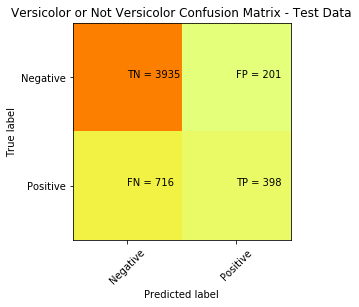

In [56]:
plt.clf()
plt.imshow(RFcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(RFcm[i][j]))
plt.show()